In [2]:
library(moments)
bikes = read.csv("day.csv",row.names=1)
head(bikes)

dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [3]:
bikes.spring.cnt = bikes$cnt[bikes$season == 1]
bikes.summer.cnt = bikes$cnt[bikes$season == 2]
bikes.autumn.cnt = bikes$cnt[bikes$season == 3]
bikes.winter.cnt = bikes$cnt[bikes$season == 4]

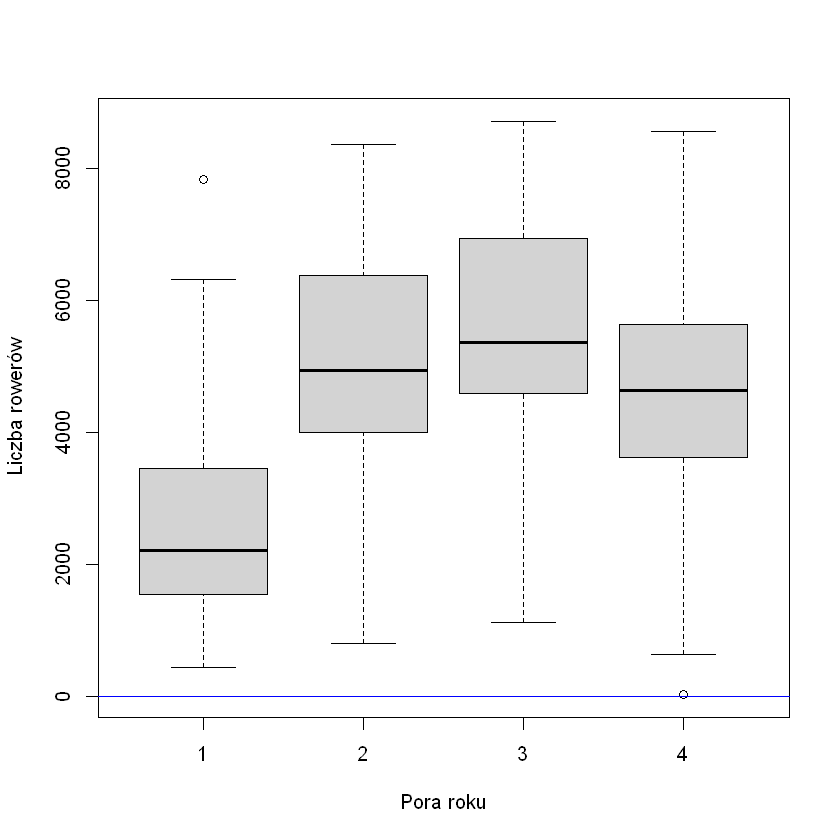

In [4]:
boxplot(cnt~season,data=bikes,col="light gray",
        ylab = "Liczba rowerów", xlab = "Pora roku")
abline(h=0,col="blue")

[1] "Skośność: 0.877970"

[1] "Kurtoza: 3.471485"

[1] "Skośność: -0.261461"

[1] "Kurtoza: 2.390451"

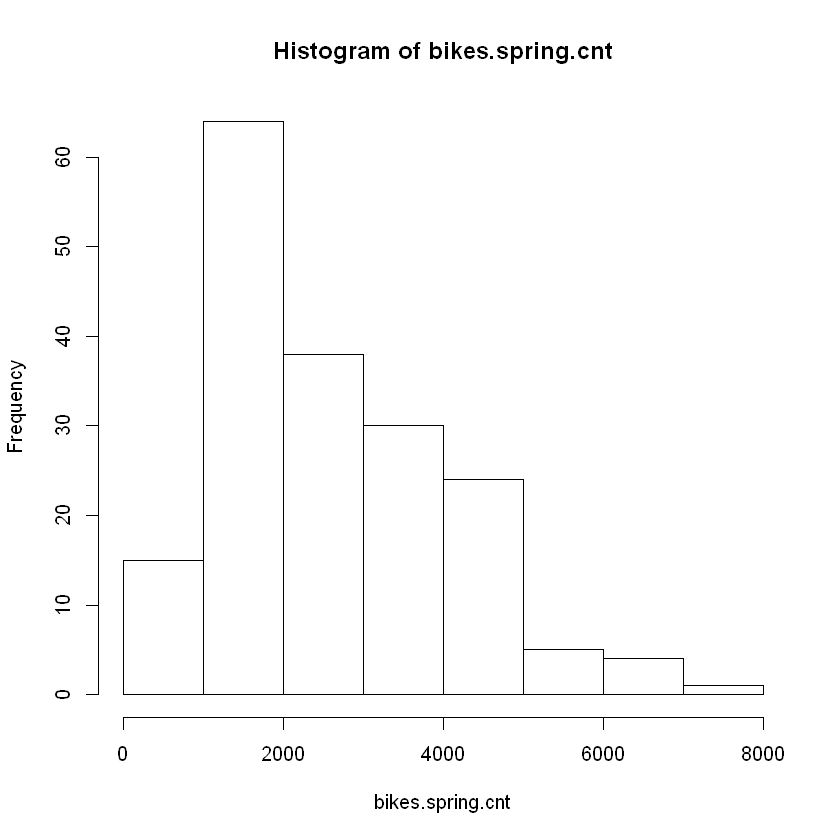

[1] "Skośność: -0.095464"

[1] "Kurtoza: 2.419311"

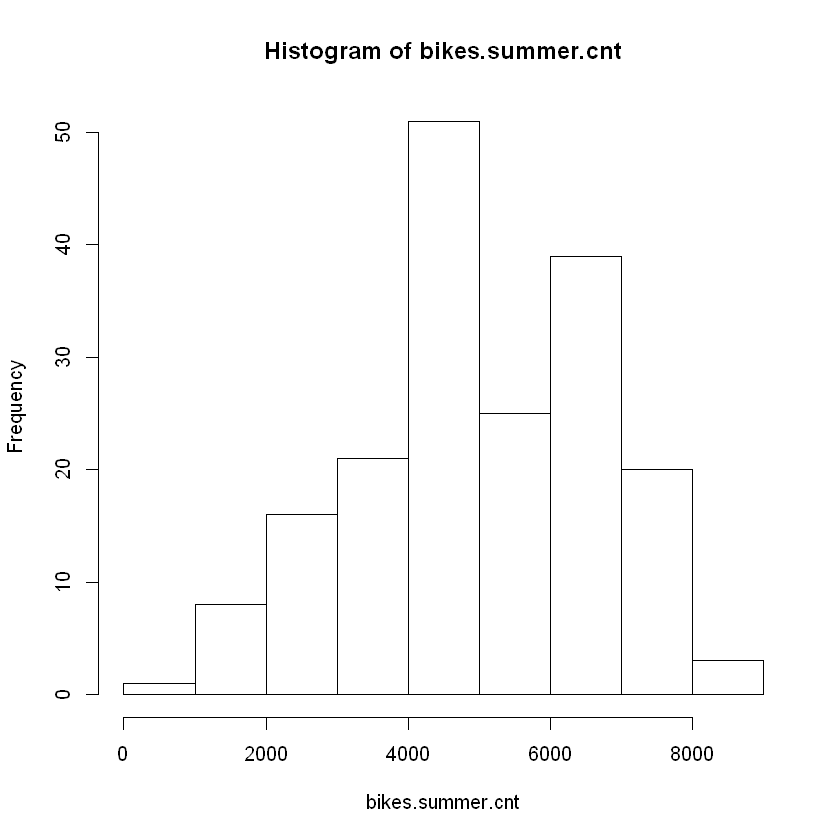

[1] "Skośność: 0.091741"

[1] "Kurtoza: 2.713946"

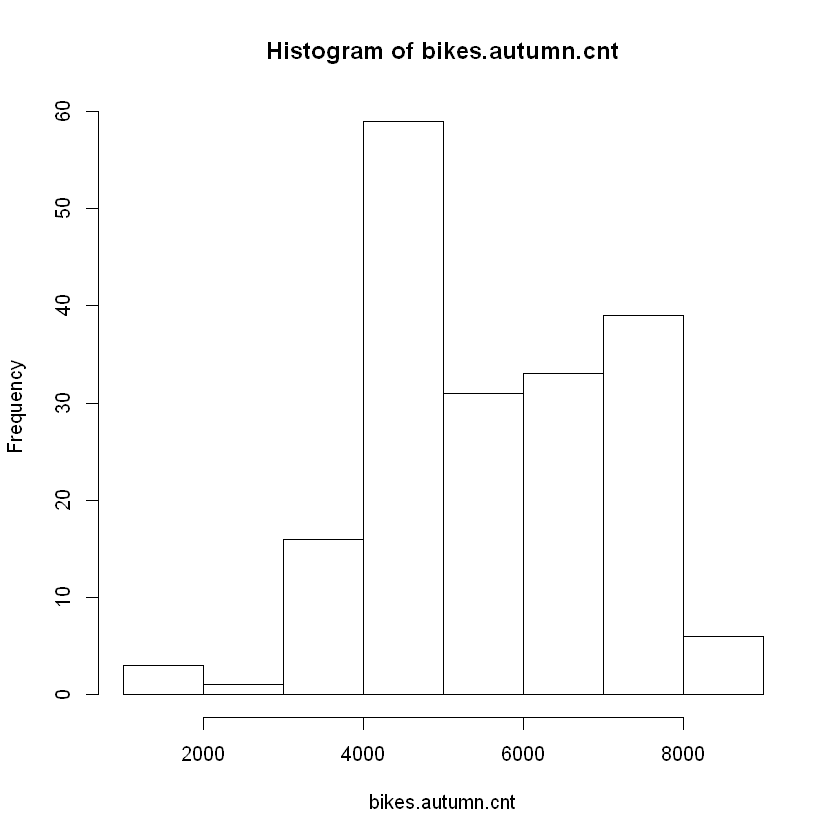

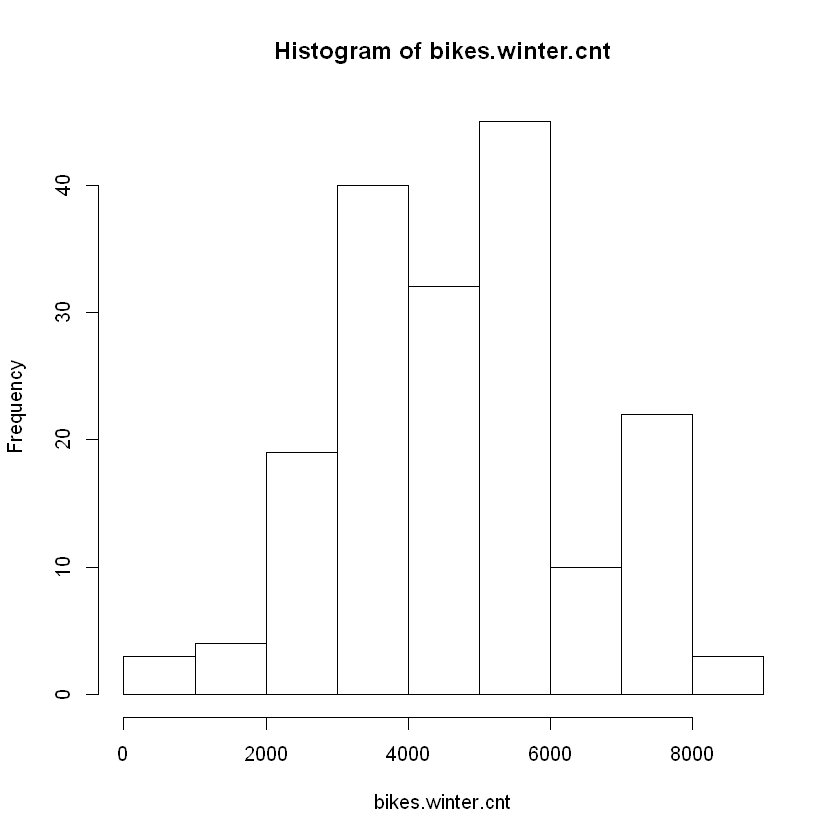

In [22]:
#bikes.spring.cnt
sprintf("Skośność: %f", skewness(bikes.spring.cnt))
sprintf("Kurtoza: %f", kurtosis(bikes.spring.cnt))
hist(bikes.spring.cnt)

#bikes.summer.cnt
sprintf("Skośność: %f",skewness(bikes.summer.cnt))
sprintf("Kurtoza: %f",kurtosis(bikes.summer.cnt))
hist(bikes.summer.cnt)

#bikes.autumn.cnt
sprintf("Skośność: %f",skewness(bikes.autumn.cnt))
sprintf("Kurtoza: %f",kurtosis(bikes.autumn.cnt))
hist(bikes.autumn.cnt)

#bikes.winter.cnt
sprintf("Skośność: %f",skewness(bikes.winter.cnt))
sprintf("Kurtoza: %f",kurtosis(bikes.winter.cnt))
hist(bikes.winter.cnt)

### Shapiro test

### Bartlett test

In [32]:
# test bartletta
bartlett.test(bikes$cnt, bikes$season)


	Bartlett test of homogeneity of variances

data:  bikes$cnt and bikes$season
Bartlett's K-squared = 10.899, df = 3, p-value = 0.01228


### Hartley test

In [30]:
min.variance = min(var(bikes.spring.cnt), var(bikes.summer.cnt), var(bikes.autumn.cnt),var(bikes.winter.cnt))
max.variance = max(var(bikes.spring.cnt), var(bikes.summer.cnt), var(bikes.autumn.cnt),var(bikes.winter.cnt))

In [31]:
hartley = max.variance / min.variance
hartley

[1] 1.473944

### Anova test

In [38]:
bikes.anova = aov(cnt~as.factor(season), data=bikes)
summary(bikes.anova)

                   Df    Sum Sq   Mean Sq F value Pr(>F)    
as.factor(season)   3 9.506e+08 316865289   128.8 <2e-16 ***
Residuals         727 1.789e+09   2460715                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Tukey test

In [39]:
TukeyHSD(bikes.anova)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = cnt ~ as.factor(season), data = bikes)

$`as.factor(season)`
         diff        lwr       upr     p adj
2-1 2388.1989  1965.3325 2811.0653 0.0000000
3-1 3040.1706  2619.5409 3460.8003 0.0000000
4-1 2124.0303  1697.6444 2550.4163 0.0000000
3-2  651.9717   233.0927 1070.8507 0.0003925
4-2 -264.1686  -688.8276  160.4904 0.3781913
4-3 -916.1403 -1338.5720 -493.7085 0.0000002
